In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [2]:
import sklearn
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/kaggle/input/facial-keypoints-detection/training.zip')
test = pd.read_csv('/kaggle/input/facial-keypoints-detection/test.zip')
lookid_data = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')

In [4]:
train.fillna(method = 'ffill', inplace = True)
#inplace = modify the original df

/tmp/ipykernel_36/3031855114.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method = 'ffill', inplace = True)


In [5]:
imag = [] #list to store all processed values
for i in range(0, 7049): #loop through all 7049 train samples
    img_str_list = train['Image'][i].split(' ') #takes every image value and splits the pixels into a new list


    processed_img_list = [] #list to store clean values
    for x in img_str_list: #for every number in pixel brightnesses
        if x == '': #if there is an empty value
            processed_img_list.append('0') #add 0 in its place
        else:
            processed_img_list.append(x) #else add the original value

    imag.append(processed_img_list) #add the clean values to imag list

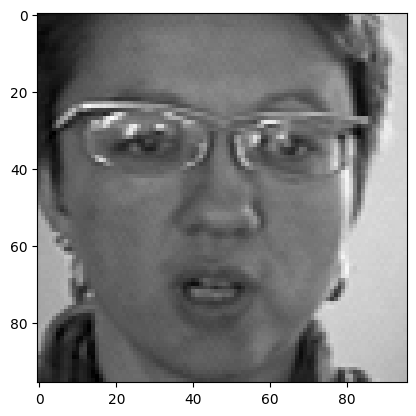

In [6]:


image_to_list = np.array(imag,dtype = 'float')
X_train = image_to_list.reshape(-1,96,96,1)

plt.imshow(X_train[10].reshape(96,96),cmap='gray')
plt.show()



In [7]:


training= train.drop("Image", axis= 1)
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:].values

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')



In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,BatchNormalization ,MaxPool2D
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                  input_shape = (96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same'
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same' 
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same' 
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same' 
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same' 
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same' 
                 ))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(30))
model.summary()

2025-08-02 12:56:56.197308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754139416.514446      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754139416.620927      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-02 12:57:16.413414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,924,990 (22.60 MB)

 Trainable params: 5,924,030 (22.60 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split = 0.15)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 298s 12s/step - loss: 828.5356 - mae: 20.3422 - val_loss: 341.2251 - val_mae: 16.1501
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 283s 12s/step - loss: 16.6744 - mae: 3.0369 - val_loss: 29.4414 - val_mae: 4.2074
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 275s 11s/step - loss: 11.6461 - mae: 2.3688 - val_loss: 39.7569 - val_mae: 5.3701
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 304s 13s/step - loss: 10.7148 - mae: 2.2541 - val_loss: 39.9613 - val_mae: 5.5000
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 279s 12s/step - loss: 10.0126 - mae: 2.1595 - val_loss: 51.5172 - val_mae: 6.3916
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 279s 12s/step - loss: 9.7957 - mae: 2.1246 - val_loss: 60.3144 - val_mae: 6.9042
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 296s 12s/step - loss: 9.8249 - mae: 2.1224 - val_loss: 62.0376 - val_mae: 7.0631
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 295s 12s/step - loss: 8.7213 - mae: 2.0278 - val_loss: 54.4581 - val_mae: 6.6626
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2

In [22]:


timag = []
for i in range(0, 1783):
    img_str_list = test['Image'][i].split(' ')
    
   
    processed_img_list = [] 
    for x in img_str_list: 
        if x == '':
            processed_img_list.append('0')
        else:
            processed_img_list.append(x)
    
    timag.append(processed_img_list) 



In [23]:


timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 



In [13]:
predict = model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step


In [24]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(predict)

In [25]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [26]:


feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))



In [27]:


preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])



In [28]:
rowid = pd.Series(rowid,name = 'RowId')

In [29]:
loc = pd.Series(preded,name = 'Location')

In [30]:
submission = pd.concat([rowid,loc],axis = 1)

In [32]:
submission.to_csv('facial_detection_submission.csv',index = False)